In [1]:
# carregamento de pacotes

import requests
import urllib
import pandas as pd
from requests_html import HTML
from requests_html import HTMLSession

**Obter a fonte da página**<br>
Em seguida, criaremos uma função chamada get_source(). Isso pega uma URL e retorna o HTML bruto da página para analisarmos. Como esta é apenas uma tarefa simples, usaremos Requests-HTML para lidar com isso. Internamente, isso usa Requests e Beautiful Soup

In [15]:
def get_source(url):
    """Retorna o código-fonte para o URL fornecido. 

    Args: 
        url (string): URL da página.

    Returns:
        response (object): HTTP response object da requests_html. 
    """

    try:
        session = HTMLSession()
        response = session.get(url)
        return response

    except requests.exceptions.RequestException as e:
        print(e)

**Execute a pesquisa**<br>
Vamos criar outra função chamada get_results() a seguir. Isso pega o URL do site que queremos verificar e o anexa a uma consulta do Google que inclui todo prefixo de site importante. Isso executa get_source() e retorna o HTML da consulta de pesquisa.

In [16]:
def get_results(url):
    
    query = urllib.parse.quote_plus(url)
    response = get_source("https://www.google.co.uk/search?q=site%3A" + url)
    
    return response

**Analise os resultados**<br>
Para analisar o HTML de resultados, podemos usar o Requests HTML. Este é um wrapper em torno do Beautiful Soup, então nos permite procurar o div com o CSS ID result-stats na página e retornar o texto de dentro da tag.<br>

O valor da string conterá algum texto no formato “About de 1.710 results (0,30 segundos)”, mas queremos apenas o número de resultados, então usaremos split para dividir isso nos espaços e obter o segundo elemento em que contém o número. Em seguida, substituiremos a vírgula por nada e converteremos o valor em um int.

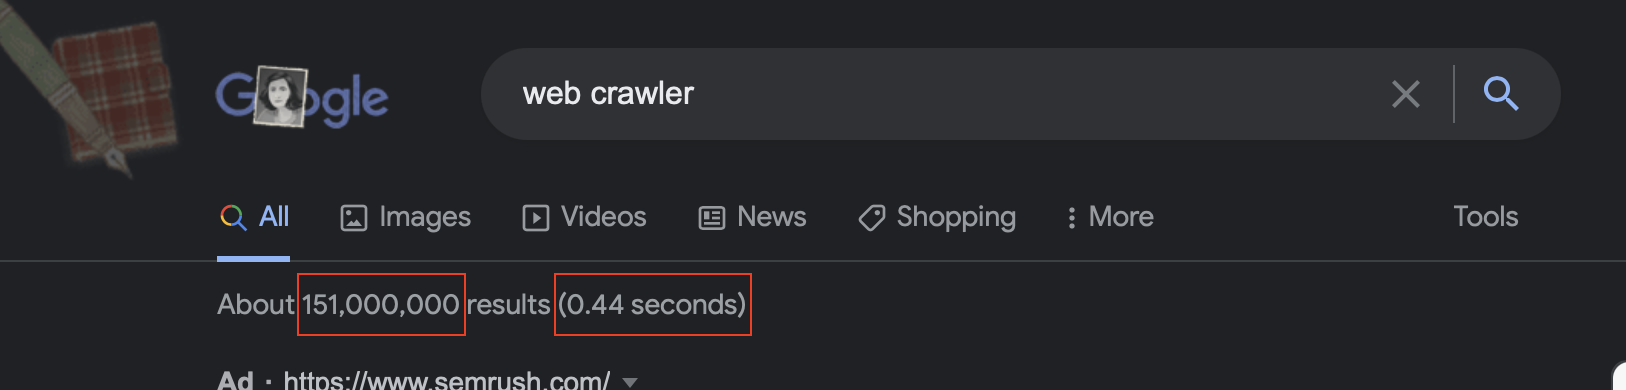


In [31]:
# padrao de busca da informacao no google

def parse_results(response):
    string = response.html.find("#result-stats", first=True).text
    #print(string)
    indexed = int(string.split(' ')[1].replace(',','').replace('.',''))
    return indexed

**Contar o número de páginas indexadas**<br>
Finalmente, podemos envolvê-los em outra função chamada count_indexed_pages(). Isso pega nossa url, executa get_results() para obter a fonte da página e usa parse_results() para retornar o número de páginas indexadas.

In [32]:
def count_indexed_pages(url):
    response = get_results(url)
    return parse_results(response)

count_indexed_pages("http://flyandlure.org")

2060

**Buscar os dados de vários sites**<br>
Se você tem deseja buscar os dados de multiplos sitets, basta uma lista de URLs e um loop for e podemos buscar os dados de cada um em questão de segundos e retornar os dados em um dataframe do Pandas.

In [33]:
sites = ['http://flyandlure.org',
        'https://beardybros.co.uk',
        'https://yorkshireflyfishing.org.uk']

In [34]:
data = []

for site in sites:
    site_data = {
        'url': site,
        'indexed_pages': count_indexed_pages(site)
    }
    
    data.append(site_data)

In [35]:
df = pd.DataFrame.from_records(data)
df.sort_values(by='indexed_pages')

,url,indexed_pages
1,https://beardybros.co.uk,254
2,https://yorkshireflyfishing.org.uk,406
0,http://flyandlure.org,2070


In [36]:
df.to_csv("count_pag_indexadas.csv")

ref https://practicaldatascience.co.uk/data-science/how-to-count-indexed-pages-using-python